In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\V3_Tested2\coords_csv\CoordV3_M8_P2_6_22_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V3_updated\Timestamp\M8_P2_6_22_24_timestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V3_updated\Audio\M8_P2_6_22_24_audio.wav'

#input coordinates for the shelter and platform 
north_pixel = 26
south_pixel = 462
east_pixel = 570
west_pixel = 101
shelter_x_pixel = 143
shelter_y_pixel = 259

#input info from time_and_audio info notebook (either from audacity or bonsai)
stimulus_start = 399.294 #stimulus start time
stimulus_end = 406.960 #stimulus end time
escape_done = 404.3 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
coord_scaled

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine1_likelihood,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood
0,0,0,NaN,NaN,0.232153,-3.530648,-31.244804,0.998167,-2.941999,-31.853875,...,0.999914,-1.370673,-29.498407,0.999990,-0.053759,-28.250923,0.999994,1.207629,-26.635771,0.999997
1,1,1,NaN,NaN,0.215648,-3.520987,-31.228078,0.999016,-2.922006,-31.852718,...,0.999935,-1.340939,-29.485669,0.999991,-0.022720,-28.245882,0.999995,1.222045,-26.624842,0.999997
2,2,2,NaN,NaN,0.172951,-3.485705,-31.228078,0.998784,-2.881785,-31.844564,...,0.999942,-1.340939,-29.461389,0.999991,-0.022720,-28.227349,0.999994,1.226788,-26.602338,0.999996
3,3,3,NaN,NaN,0.172518,-3.481267,-31.228078,0.998047,-2.856370,-31.844564,...,0.999935,-1.340939,-29.450622,0.999991,-0.021267,-28.219662,0.999994,1.236092,-26.602338,0.999997
4,4,4,NaN,NaN,0.208827,-3.458686,-31.215375,0.999094,-2.841644,-31.831131,...,0.999928,-1.340939,-29.448727,0.999991,-0.017715,-28.209121,0.999994,1.244935,-26.590409,0.999996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14723,14723,14723,-29.776141,1.89856,0.000205,-30.769178,3.693479,0.008219,-29.740663,-0.281725,...,0.000016,-29.647781,4.796132,0.000336,23.651907,-33.210070,0.000032,-29.482748,0.950486,0.001462
14724,14724,14724,-29.776141,1.89856,0.000385,-30.769178,3.693479,0.007667,-29.740663,-0.222915,...,0.000018,-29.647781,4.796132,0.000333,23.651907,-33.210070,0.000039,-29.474290,1.101641,0.004309
14725,14725,14725,-29.776141,1.89856,0.000240,-30.769178,3.693479,0.008883,-29.745028,-0.115403,...,0.000021,-29.647781,4.796132,0.000291,23.649343,-33.193667,0.000036,-29.452521,1.122018,0.007893
14726,14726,14726,-29.776141,1.89856,0.000273,-30.769178,3.693479,0.009445,-29.745028,-0.115403,...,0.000024,-29.647781,4.796132,0.000275,23.644079,-33.193667,0.000046,-29.474290,1.122018,0.004018


In [8]:
#convert timestamps to zeroed seconds
convert_time(time_path, coord_scaled)

In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range = dataframe_ranges(-15, 30, escape,coord_scaled)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

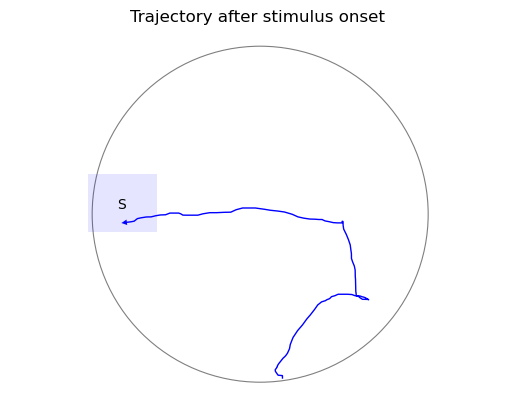

In [16]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

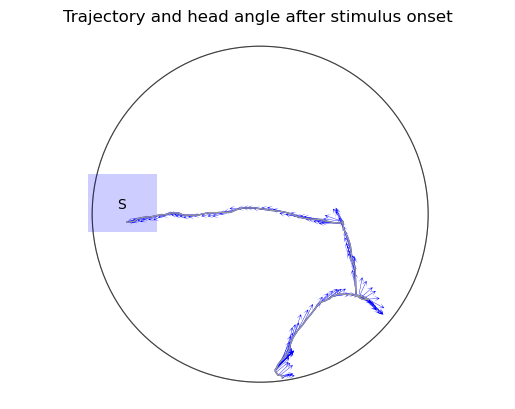

In [17]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

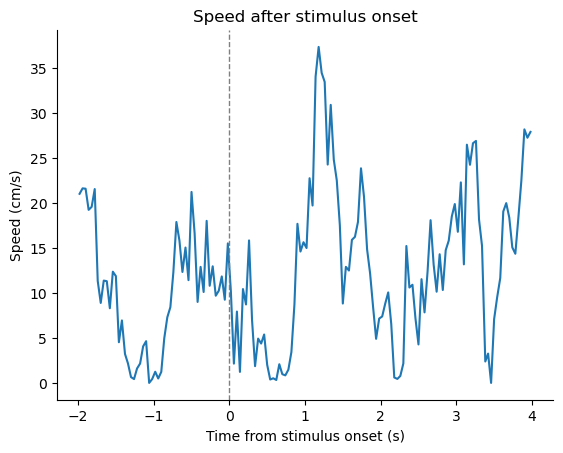

In [18]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

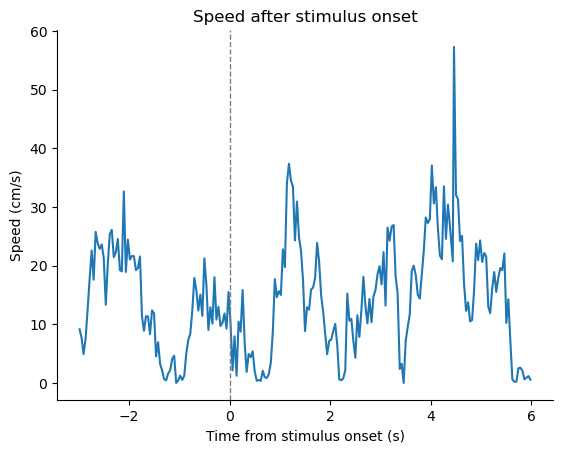

In [19]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

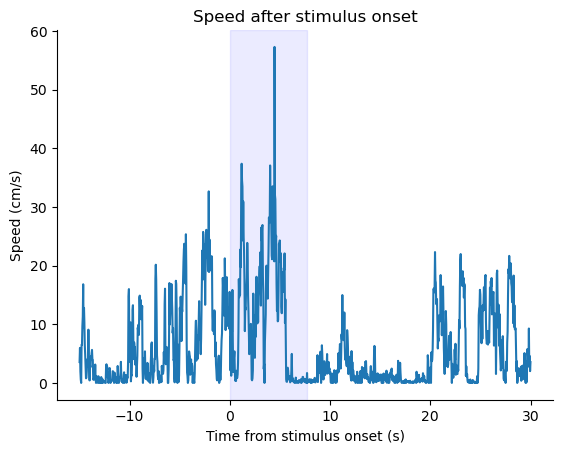

In [20]:
speed_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

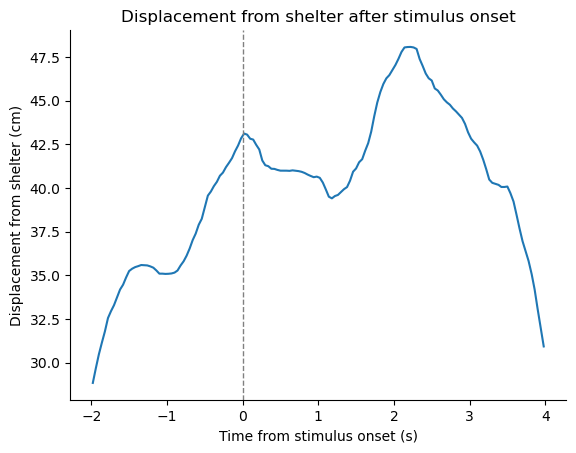

In [21]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

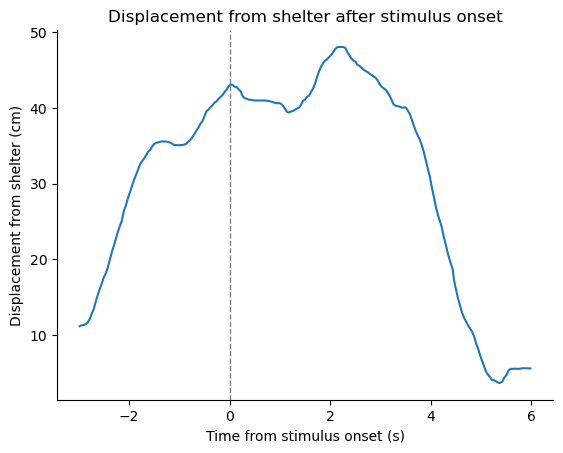

In [22]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

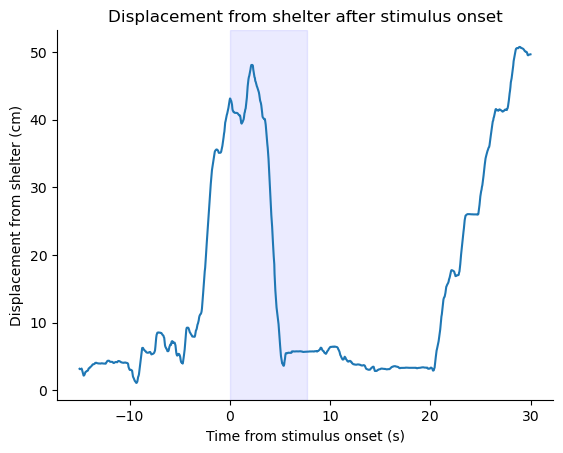

In [23]:
displacement_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

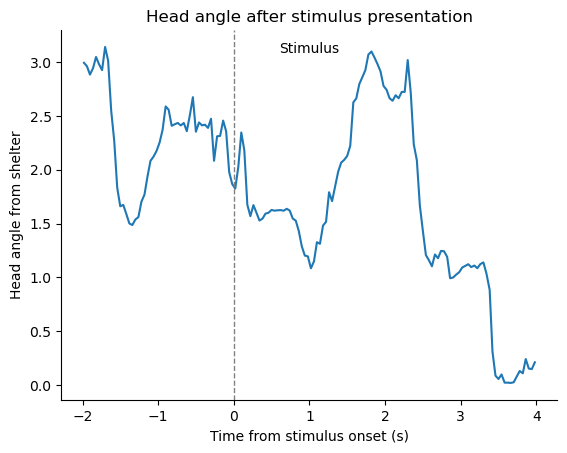

In [24]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

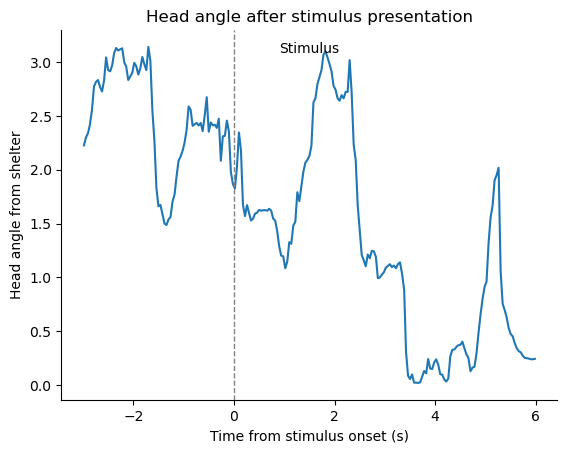

In [25]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

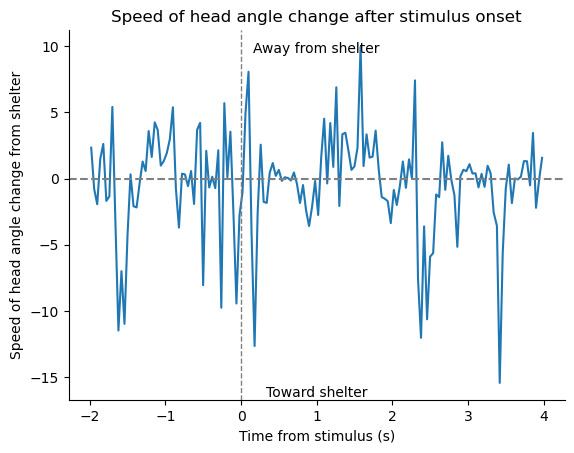

In [26]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [27]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [28]:
shelter_rotation(shelter_x, shelter_y, escape_only)

ValueError: Cannot set a DataFrame with multiple columns to the single column normalized_x

In [ ]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [ ]:
likelihood_data #need to adjust time frame to be useful 